In [1]:
from __future__ import division, print_function

In [2]:
import sys
sys.path.append('./')
import os.path

In [3]:
import numpy as np
from plot import plot_det, plot_fit
import matplotlib.pyplot as plt
from common import basecolors, lightcolors, darkcolors
from common import num_representation, safe_num_representation_max
from common import OrganNames, A0s, taus, DetNames, MCout 
from common import activity, det_response_teo, det_contributions, det_response, det_response_smear
from common import det_matrix_smear

In [4]:
from smearing_common import widths, times, CPSall, errCPSall

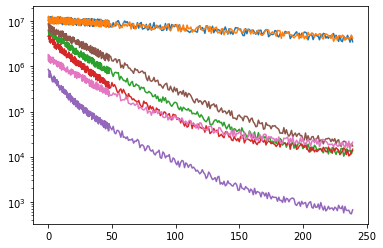

In [5]:
for k in range(7):
    plt.plot(times,CPSall[k])
plt.yscale('log') 

In [6]:
MCout = np.asarray(MCout)
MCout.shape

(7, 6)

In [7]:
MCout

array([[1.4417e-02, 4.4000e-05, 3.0000e-05, 1.0000e-06, 7.5000e-05,
        5.5000e-05],
       [1.4322e-02, 3.6000e-05, 3.0000e-05, 1.0000e-06, 7.4000e-05,
        8.6000e-05],
       [3.7000e-05, 2.1715e-02, 1.9280e-03, 2.2800e-04, 2.6060e-03,
        7.4200e-04],
       [4.2000e-05, 1.8960e-03, 2.1854e-02, 2.0900e-04, 9.1500e-04,
        4.9090e-03],
       [2.0000e-06, 2.0300e-04, 1.9600e-04, 1.4516e-02, 1.5600e-04,
        1.0800e-04],
       [5.5000e-05, 1.7280e-03, 6.0800e-04, 1.5300e-04, 6.1950e-03,
        4.2000e-04],
       [6.1000e-05, 4.6800e-04, 1.7610e-03, 1.7300e-04, 6.8700e-04,
        3.8230e-03]])

Butto il primo detector sulla tiroide per avere una matrice quadrata

In [8]:
MCoutq = np.delete(MCout,0,0)
MCoutq.shape

(6, 6)

In [9]:
MCoutq

array([[1.4322e-02, 3.6000e-05, 3.0000e-05, 1.0000e-06, 7.4000e-05,
        8.6000e-05],
       [3.7000e-05, 2.1715e-02, 1.9280e-03, 2.2800e-04, 2.6060e-03,
        7.4200e-04],
       [4.2000e-05, 1.8960e-03, 2.1854e-02, 2.0900e-04, 9.1500e-04,
        4.9090e-03],
       [2.0000e-06, 2.0300e-04, 1.9600e-04, 1.4516e-02, 1.5600e-04,
        1.0800e-04],
       [5.5000e-05, 1.7280e-03, 6.0800e-04, 1.5300e-04, 6.1950e-03,
        4.2000e-04],
       [6.1000e-05, 4.6800e-04, 1.7610e-03, 1.7300e-04, 6.8700e-04,
        3.8230e-03]])

Calcolo l'inversa

In [10]:
Minv = np.linalg.inv(MCoutq)
Minv

array([[ 6.98317387e+01, -3.47114471e-02,  5.07784460e-02,
         2.04730340e-02, -6.54785882e-01, -1.55800315e+00],
       [-2.77958109e-02,  4.79565983e+01, -3.46968995e+00,
        -4.67022218e-01, -1.93480771e+01, -2.71307005e+00],
       [ 1.32245325e-01, -3.14860084e+00,  5.12726295e+01,
         7.94760060e-02,  9.94004415e-01, -6.53409664e+01],
       [ 2.90005083e-03, -4.73884011e-01, -4.47723389e-01,
         6.89310642e+01, -1.34473769e+00, -1.13275398e+00],
       [-5.52554623e-01, -1.29148795e+01, -2.51318282e+00,
        -1.38691802e+00,  1.68679500e+02, -1.27460183e+01],
       [-1.07258915e+00, -2.07752560e+00, -2.27220430e+01,
        -2.84983027e+00, -2.83300488e+01,  2.94371613e+02]])

controllo che l'inversa per la matrice faccia un'identita'

In [11]:
print(Minv*MCoutq)

[[ 1.00013016e+00 -1.24961210e-06  1.52335338e-06  2.04730340e-08
  -4.84541553e-05 -1.33988271e-04]
 [-1.02844500e-06  1.04137753e+00 -6.68956222e-03 -1.06481066e-04
  -5.04210888e-02 -2.01309797e-03]
 [ 5.55430367e-06 -5.96974720e-03  1.12051204e+00  1.66104852e-05
   9.09514039e-04 -3.20758804e-01]
 [ 5.80010167e-09 -9.61984542e-05 -8.77537842e-05  1.00060333e+00
  -2.09779080e-04 -1.22337430e-04]
 [-3.03905043e-05 -2.23169118e-02 -1.52801516e-03 -2.12198457e-04
   1.04496950e+00 -5.35332769e-03]
 [-6.54279382e-05 -9.72281982e-04 -4.00135177e-02 -4.93020637e-04
  -1.94627435e-02  1.12538268e+00]]


In [12]:
CPSall = np.empty(shape=(len(MCout),len(times)))
for i in range(0,len(MCout)):
    resp = det_response_smear(times, A0s, taus, i, 0.2)
    CPSall[i] = resp

In [13]:
CPSall.shape

(7, 432)

butto anche il primo detector dai conteggi

In [14]:
CPSall = np.delete(CPSall,0,0)
CPSall.shape

(6, 432)

moltiplico l'output dei detector per la matrice inversa (usando il prodotto fra matrici così da avere l'attività stimata in funzione del tempo)

In [15]:
CPSall_inv = Minv.dot(CPSall)
CPSall_inv.shape

(6, 432)

In [16]:
CPSall[0].shape

(432,)

confronto l'output stimato con gli andamenti teorici

/home/carlo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


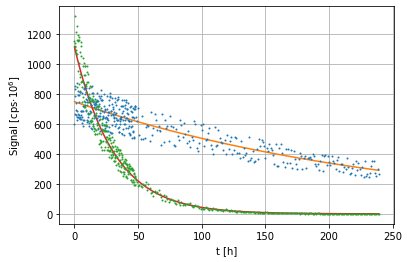

In [17]:
for i in (0,4):
    y = CPSall_inv[i]
    A0 = A0s[i]
    tau = taus[i]
    plt.errorbar(times, y/1.e+6, np.sqrt(y)/1.e+6,None, 'o', markersize=1)
    yt = A0*np.exp(-times/tau)
    plt.plot(times, yt/1.e+6)
plt.xlabel('t [h]')
plt.ylabel(r'Signal [cps$\cdot 10^{6}$]')
#plt.yscale('log')
plt.grid()

/home/carlo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/carlo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/carlo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/carlo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


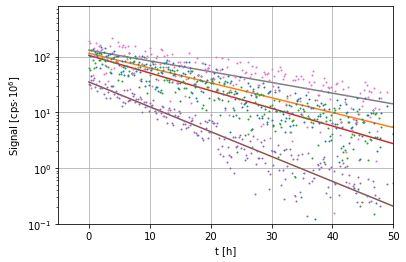

In [18]:
for i in (1,2,3,5):
    y = CPSall_inv[i]
    A0 = A0s[i]
    tau = taus[i]
    plt.errorbar(times, y/1.e+6, np.sqrt(y)/1.e+6,None, 'o', markersize=1)
    yt = A0*np.exp(-times/tau)
    plt.plot(times, yt/1.e+6)
plt.xlabel('t [h]')
plt.ylabel(r'Signal [cps$\cdot 10^{6}$]')
plt.yscale('log')
plt.xlim(-5,50)
plt.ylim(1.e-1,)
plt.grid()

a questo punto secondo me manco serve fare un fit, si fa una media mobile per eliminare le fluttuazioni

definisco una funzione per calcolare la media mobile usando la convoluzione di numpy per essere più veloce. Convolve la funzione con un vettore di fatto di 1 lungo la dimensione della finestra (window). La convoluzione e' fatta solo per gli elementi in cui entrambi i vettori sono diversi da zero (valid). Divido poi per la dimensione della finestra per fare la media.

In [19]:
def moving_average(x, window):
    return np.convolve(x, np.ones(window),'valid') / window

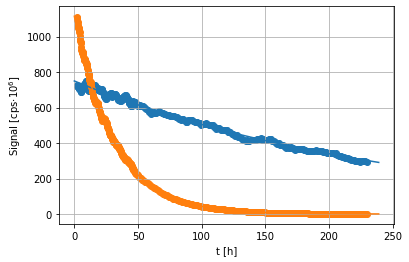

In [20]:
w = 20
timesm = moving_average(times,window=w)
for i in (0,4):
    y = moving_average(CPSall_inv[i],window=w)
    A0 = A0s[i]
    tau = taus[i]
    #plt.errorbar(times, y/1.e+6, np.sqrt(y)/1.e+6,None, 'o', markersize=1)
    plt.scatter(timesm,y/1.e+6)
    yt = A0*np.exp(-times/tau)
    plt.plot(times, yt/1.e+6)
plt.xlabel('t [h]')
plt.ylabel(r'Signal [cps$\cdot 10^{6}$]')
#plt.yscale('log')
plt.grid()

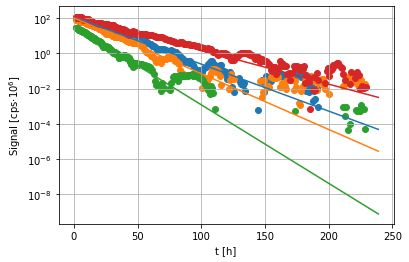

In [21]:
for i in (1,2,3,5):
    y = moving_average(CPSall_inv[i],window=w)
    A0 = A0s[i]
    tau = taus[i]
    #plt.errorbar(times, y/1.e+6, np.sqrt(y)/1.e+6,None, 'o', markersize=1)
    plt.scatter(timesm,y/1.e+6)
    yt = A0*np.exp(-times/tau)
    plt.plot(times, yt/1.e+6)
plt.xlabel('t [h]')
plt.ylabel(r'Signal [cps$\cdot 10^{6}$]')
plt.yscale('log')
plt.grid()

o forse anche direttamente l'integrale numerico con il metodo dei trapezi

In [22]:
tin = times[0]
tfin = times[-1]
AttTrue = -A0s*taus*(np.exp(-tfin/taus)-np.exp(-tin/taus))

In [23]:
AttStim = np.trapz(CPSall_inv,x=times,axis=1)

controllo i valori stimati e quelli calcolati (veri)

In [24]:
AttTrue

array([1.15859561e+11, 1.87407626e+09, 1.44001330e+09, 3.41056479e+08,
       3.43116845e+10, 2.92952884e+09])

In [25]:
AttStim

array([1.15047316e+11, 1.83589268e+09, 1.42879837e+09, 3.43446619e+08,
       3.45361774e+10, 2.91121775e+09])

calcolo lo scarto percentuale

In [26]:
(AttTrue-AttStim)/AttTrue*100

array([ 0.70105986,  2.03746135,  0.77880734, -0.7008049 , -0.65427535,
        0.62505247])

In [27]:
MCout.shape

(7, 6)

In [28]:
widths = np.array([.05,.1,.15,.2,.25,.3,.35,.4])
nsteps = 100

print("AttTrue",AttTrue)
Att_means = np.empty(shape=(len(widths),len(A0s)))
Att_vars = np.empty(shape=(len(widths),len(A0s)))
AttT = np.empty(shape=(len(widths),len(A0s)))
for i, width in enumerate(widths):
    residui = np.empty(shape=(nsteps,len(A0s)))
    for j in range(nsteps):
        for k in range(0,len(MCoutq)):
            resp = det_response_smear(times, A0s, taus, k+1, 0.2)
            CPSall[k] = resp
        CPSall_inv = Minv.dot(CPSall)
        AttStim = np.trapz(CPSall_inv,x=times,axis=1)
        print("AttStim",AttStim)
        residui[j] = (AttTrue-AttStim)/AttTrue*100
    for j in range(len(A0s)):    
        Att_means[i][j] = np.mean(residui[:,j])
        Att_vars[i][j] = np.std(residui[:,j])        

AttTrue [1.15859561e+11 1.87407626e+09 1.44001330e+09 3.41056479e+08
 3.43116845e+10 2.92952884e+09]
AttStim [1.15645570e+11 1.99265609e+09 1.40127432e+09 3.43472628e+08
 3.40653523e+10 3.02993952e+09]
AttStim [1.16318105e+11 1.90502584e+09 1.37638896e+09 3.38228551e+08
 3.43148935e+10 3.06800232e+09]
AttStim [1.17128441e+11 1.93092434e+09 1.44979364e+09 3.38457452e+08
 3.40373580e+10 2.83995567e+09]
AttStim [1.16231448e+11 1.86760935e+09 1.41805503e+09 3.33151042e+08
 3.44605591e+10 2.89402910e+09]
AttStim [1.15606233e+11 1.83904261e+09 1.42457515e+09 3.25555891e+08
 3.47395512e+10 2.87788881e+09]
AttStim [1.16181411e+11 1.90826727e+09 1.41091063e+09 3.40798939e+08
 3.41685544e+10 2.89858150e+09]
AttStim [1.15134088e+11 1.92094681e+09 1.36358899e+09 3.38184735e+08
 3.41520451e+10 3.16394032e+09]
AttStim [1.14865377e+11 1.87355462e+09 1.44824349e+09 3.39294258e+08
 3.42568042e+10 2.98693858e+09]
AttStim [1.15914869e+11 1.85197314e+09 1.46096483e+09 3.36514141e+08
 3.45292440e+10 2.8797

 3.46961669e+10 2.76364733e+09]
AttStim [1.13579605e+11 1.92502761e+09 1.39661800e+09 3.39586212e+08
 3.40443895e+10 3.01904676e+09]
AttStim [1.15760913e+11 1.90241208e+09 1.36327176e+09 3.37734769e+08
 3.40732128e+10 3.16594751e+09]
AttStim [1.17480401e+11 1.95237023e+09 1.37074280e+09 3.41493431e+08
 3.43095888e+10 3.08335685e+09]
AttStim [1.16490419e+11 1.87634715e+09 1.46129992e+09 3.32406349e+08
 3.46350723e+10 2.90085809e+09]
AttStim [1.16447530e+11 1.87164486e+09 1.39113324e+09 3.35806411e+08
 3.41363568e+10 3.13629474e+09]
AttStim [1.17478639e+11 1.92277625e+09 1.40380696e+09 3.40347909e+08
 3.42397642e+10 2.93974639e+09]
AttStim [1.14932539e+11 1.88634584e+09 1.40728285e+09 3.49174677e+08
 3.42785963e+10 2.96152021e+09]
AttStim [1.16333437e+11 1.88360201e+09 1.45169192e+09 3.36862261e+08
 3.40773568e+10 2.91041339e+09]
AttStim [1.16916676e+11 1.97676082e+09 1.42969963e+09 3.36173309e+08
 3.41963073e+10 2.98501432e+09]
AttStim [1.15626754e+11 1.89167874e+09 1.42776779e+09 3.238

AttStim [1.17424431e+11 1.85079694e+09 1.44817854e+09 3.46510117e+08
 3.42180145e+10 2.88118623e+09]
AttStim [1.15173195e+11 1.92602461e+09 1.46710955e+09 3.42704272e+08
 3.39673070e+10 2.96530514e+09]
AttStim [1.15730128e+11 1.84682895e+09 1.37547994e+09 3.38385479e+08
 3.41969304e+10 3.01690901e+09]
AttStim [1.14875154e+11 1.93181558e+09 1.44382659e+09 3.52779570e+08
 3.40877026e+10 2.96051658e+09]
AttStim [1.16034712e+11 1.89814167e+09 1.40405633e+09 3.43923164e+08
 3.42096835e+10 3.07255072e+09]
AttStim [1.15830767e+11 1.90054306e+09 1.44551937e+09 3.44228757e+08
 3.41227310e+10 3.01082381e+09]
AttStim [1.16078768e+11 1.87687887e+09 1.43992420e+09 3.41276023e+08
 3.45652473e+10 2.83173747e+09]
AttStim [1.15252143e+11 1.89509793e+09 1.42679958e+09 3.48334571e+08
 3.39737077e+10 2.93700355e+09]
AttStim [1.15691472e+11 1.94552882e+09 1.44697025e+09 3.56373074e+08
 3.38904281e+10 2.98623024e+09]
AttStim [1.15391150e+11 1.87915446e+09 1.37836948e+09 3.43126668e+08
 3.39981164e+10 2.9935

AttStim [1.15166817e+11 1.83887459e+09 1.46224223e+09 3.38491992e+08
 3.40632568e+10 3.04634765e+09]
AttStim [1.15389152e+11 1.85230788e+09 1.36892456e+09 3.38734685e+08
 3.45086686e+10 2.98579735e+09]
AttStim [1.16254729e+11 1.91690950e+09 1.40928663e+09 3.36309799e+08
 3.43002593e+10 2.76150164e+09]
AttStim [1.16202935e+11 1.93713310e+09 1.49078604e+09 3.38674469e+08
 3.46937664e+10 2.64318583e+09]
AttStim [1.14715112e+11 1.83338194e+09 1.40793648e+09 3.27492332e+08
 3.45779061e+10 2.99282025e+09]
AttStim [1.14836543e+11 1.95423056e+09 1.44154758e+09 3.30147423e+08
 3.40608877e+10 3.01564619e+09]
AttStim [1.16841059e+11 1.90852617e+09 1.47242422e+09 3.41469820e+08
 3.43363058e+10 2.86657661e+09]
AttStim [1.16030473e+11 1.77377524e+09 1.44365040e+09 3.40978307e+08
 3.46735905e+10 2.95526873e+09]
AttStim [1.16654184e+11 1.90676836e+09 1.39266325e+09 3.41889218e+08
 3.45794692e+10 3.00068608e+09]
AttStim [1.16073365e+11 1.82392590e+09 1.43417781e+09 3.48406561e+08
 3.45242141e+10 2.8495

AttStim [1.15108286e+11 1.92301892e+09 1.43033083e+09 3.39873431e+08
 3.42821525e+10 2.96783236e+09]
AttStim [1.15006305e+11 1.91528808e+09 1.44592779e+09 3.38936699e+08
 3.42391468e+10 2.94675151e+09]
AttStim [1.16103231e+11 1.86723277e+09 1.45533417e+09 3.38393659e+08
 3.43137884e+10 2.87791502e+09]
AttStim [1.15736405e+11 1.79710384e+09 1.44731821e+09 3.29843365e+08
 3.47155865e+10 2.80711744e+09]
AttStim [1.16309299e+11 1.85007597e+09 1.43792642e+09 3.37258005e+08
 3.39508169e+10 2.91824749e+09]
AttStim [1.15336751e+11 2.00160231e+09 1.43619852e+09 3.50786664e+08
 3.38535036e+10 3.04479270e+09]
AttStim [1.16115477e+11 1.87526313e+09 1.48422960e+09 3.38778480e+08
 3.41872305e+10 2.81299191e+09]
AttStim [1.17112486e+11 1.84391591e+09 1.44235465e+09 3.46003302e+08
 3.42192690e+10 3.06018213e+09]
AttStim [1.16663360e+11 1.94668855e+09 1.47353507e+09 3.41789777e+08
 3.43215233e+10 2.90950442e+09]
AttStim [1.14710609e+11 1.87273727e+09 1.39546896e+09 3.47466129e+08
 3.45107895e+10 2.8957

AttStim [1.14743999e+11 1.91077565e+09 1.41127834e+09 3.39519033e+08
 3.39857832e+10 3.07298422e+09]
AttStim [1.16699643e+11 1.83312378e+09 1.41889826e+09 3.42675605e+08
 3.47376384e+10 2.81915278e+09]
AttStim [1.15716224e+11 1.87830678e+09 1.42406260e+09 3.42928932e+08
 3.42106090e+10 2.86464970e+09]
AttStim [1.15151673e+11 1.90459017e+09 1.40420034e+09 3.39077679e+08
 3.44003959e+10 2.92601466e+09]
AttStim [1.16423889e+11 1.85483901e+09 1.44449428e+09 3.33893818e+08
 3.44703385e+10 2.91066433e+09]
AttStim [1.16788989e+11 1.89046115e+09 1.46204036e+09 3.31524389e+08
 3.41017211e+10 2.83498501e+09]
AttStim [1.17006415e+11 1.86815062e+09 1.51075752e+09 3.53961452e+08
 3.40968232e+10 2.86446830e+09]
AttStim [1.15993452e+11 1.93035139e+09 1.42933920e+09 3.38150818e+08
 3.42425810e+10 3.02387062e+09]
AttStim [1.15838113e+11 1.87091708e+09 1.46582247e+09 3.34779797e+08
 3.42851387e+10 2.93782846e+09]
AttStim [1.16453417e+11 1.76056758e+09 1.46311464e+09 3.38704562e+08
 3.47465093e+10 2.8911

AttStim [1.15306335e+11 1.96888082e+09 1.43229762e+09 3.38167865e+08
 3.38675676e+10 2.99287450e+09]
AttStim [1.16862603e+11 1.79305478e+09 1.47249637e+09 3.45632299e+08
 3.41362655e+10 2.84754713e+09]
AttStim [1.15887247e+11 1.87196508e+09 1.38623412e+09 3.32244917e+08
 3.45928613e+10 2.97319334e+09]
AttStim [1.16603707e+11 1.96121700e+09 1.39009847e+09 3.49878462e+08
 3.38670324e+10 2.91514593e+09]
AttStim [1.16214509e+11 1.85454841e+09 1.43324513e+09 3.33196161e+08
 3.44550041e+10 2.77116103e+09]
AttStim [1.15655975e+11 1.82081077e+09 1.50021142e+09 3.38630298e+08
 3.45516777e+10 2.88231784e+09]
AttStim [1.16815324e+11 1.85416442e+09 1.37765345e+09 3.47633918e+08
 3.40873273e+10 2.94355352e+09]
AttStim [1.16747119e+11 1.74623261e+09 1.43774330e+09 3.33065853e+08
 3.49954084e+10 2.81377079e+09]
AttStim [1.15383818e+11 1.84661146e+09 1.37465997e+09 3.47151905e+08
 3.45614557e+10 3.03444499e+09]
AttStim [1.16147802e+11 1.71387133e+09 1.41492356e+09 3.33728199e+08
 3.48408128e+10 2.8296

Text(0.5, 0, 'Smearing half-width [%]')

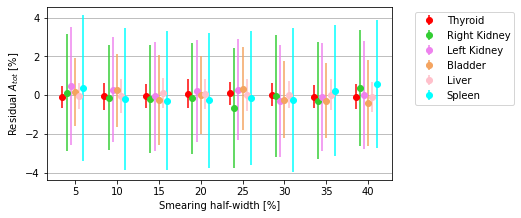

In [29]:
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.71,.8,.6))
for j in range(len(A0s)):
    x = np.asarray(widths)*100
    x = x+j/2-len(A0s)/4
    plt.errorbar(x, Att_means[:,j], Att_vars[:,j], None, 'o', label=OrganNames[j],color=lightcolors[j])
#plt.ylim(-100,100)
plt.grid(axis='y')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_ylabel(r'Residual $A_{tot}$ [%]')
plt.gca().set_xlabel("Smearing half-width [%]")

Text(0.5, 0, 'Smearing half-width [%]')

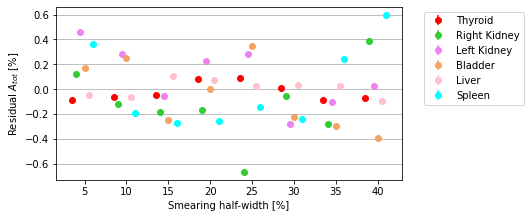

In [30]:
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.71,.8,.6))
for j in range(len(A0s)):
    x = np.asarray(widths)*100
    x = x+j/2-len(A0s)/4
    plt.errorbar(x, Att_means[:,j], Att_vars[:,j]/1000, None, 'o', label=OrganNames[j],color=lightcolors[j])
#plt.ylim(-100,100)
plt.grid(axis='y')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_ylabel(r'Residual $A_{tot}$ [%]')
plt.gca().set_xlabel("Smearing half-width [%]")

In [31]:
MCoutMeans = np.array([[1.4299166e+00, 4.0853000e-03, 3.7124000e-03, 3.0120000e-04,
        7.7635000e-03, 7.2320000e-03],
       [1.4298926e+00, 3.7064000e-03, 4.1367000e-03, 2.9590000e-04,
        6.9951000e-03, 8.6565000e-03],
       [4.3793000e-03, 2.0782608e+00, 1.9242970e-01, 2.2154200e-02,
        2.6461940e-01, 7.5509400e-02],
       [4.5262000e-03, 1.9184860e-01, 2.0634857e+00, 2.2334100e-02,
        9.2310400e-02, 4.8681430e-01],
       [3.1450000e-04, 2.0047900e-02, 1.9737300e-02, 1.3739967e+00,
        1.6409000e-02, 1.1543300e-02],
       [6.0074000e-03, 1.7345030e-01, 5.8404600e-02, 1.6286100e-02,
        6.0498280e-01, 4.0783800e-02],
       [5.1559000e-03, 4.7187300e-02, 1.7553810e-01, 1.7694400e-02,
        6.4716500e-02, 3.4382680e-01]])

In [32]:
MCoutSigmas=np.array([[4.21197797e-03, 2.31272372e-04, 1.74723324e-04, 4.25741706e-05,
        3.10346178e-04, 2.52063484e-04],
       [3.65129884e-03, 1.91705608e-04, 1.66811600e-04, 5.50653248e-05,
        2.80265927e-04, 2.93899217e-04],
       [6.16441814e-04, 1.11378124e-01, 3.81523646e-02, 2.90797290e-03,
        2.88574959e-02, 1.03886275e-02],
       [6.16337213e-04, 3.37265129e-02, 1.12718110e-01, 2.67607477e-03,
        7.97036610e-03, 8.83660876e-02],
       [6.23117164e-05, 2.47125365e-03, 2.30711155e-03, 4.03030100e-02,
        2.30198849e-03, 1.47022315e-03],
       [7.59573064e-04, 6.22798546e-03, 4.75219095e-03, 1.82665481e-03,
        2.75738979e-02, 4.33147175e-03],
       [7.11350961e-04, 4.06494670e-03, 4.52742105e-03, 2.31068142e-03,
        8.07919741e-03, 2.12341071e-02]])

In [33]:
np.random.normal(size=MCoutMeans.shape)*MCoutSigmas + MCoutMeans

array([[1.43654195e+00, 3.80064489e-03, 3.77023509e-03, 2.09344263e-04,
        7.75115724e-03, 7.15305402e-03],
       [1.42467466e+00, 3.61630526e-03, 4.08274462e-03, 2.55693946e-04,
        6.71389934e-03, 8.71150248e-03],
       [4.37559824e-03, 2.10766159e+00, 2.08425597e-01, 2.09397045e-02,
        2.98485809e-01, 6.03711524e-02],
       [5.09735633e-03, 2.03341920e-01, 2.11407356e+00, 2.54965304e-02,
        8.70603215e-02, 5.59447041e-01],
       [3.56150976e-04, 2.10166449e-02, 2.12991913e-02, 1.38700649e+00,
        1.48705407e-02, 1.26455731e-02],
       [5.81518727e-03, 1.77329994e-01, 5.94063456e-02, 1.60969777e-02,
        6.22415293e-01, 4.39669628e-02],
       [5.44679953e-03, 4.21890077e-02, 1.72641803e-01, 1.80079426e-02,
        7.36599417e-02, 3.95837406e-01]])

0
1
2
3
4
5
6


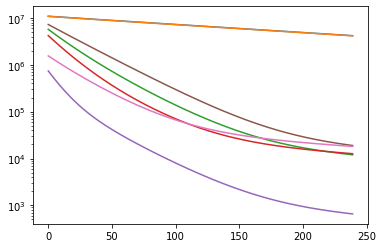

In [34]:
for k in range(7):
    resp = np.zeros(len(times))
    print(k)
    for i, (A0, tau) in enumerate(zip(A0s, taus)):
        resp += A0*np.exp(-times/tau)*MCout[k][i]
    plt.plot(times,resp)
plt.yscale('log')    

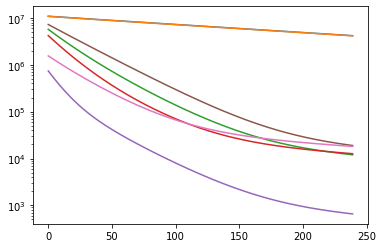

In [35]:
CPSall = np.zeros(shape=(7,len(times)))        
for k in range(7):
    resp = np.zeros(len(times))
    for i, (A0, tau) in enumerate(zip(A0s, taus)):
        resp += A0*np.exp(-times/tau)*MCout[k][i]
        CPSall[k] = resp
for k in range(7):
    plt.plot(times,CPSall[k])
plt.yscale('log')    

In [36]:
widths = np.arange(0,2.,0.1)
widths = np.array([1.])
nsteps = 1
norgans = 6
ndet = 7

print("AttTrue:",AttTrue)
Att_means = np.zeros(shape=(len(widths),norgans))
Att_vars = np.zeros(shape=(len(widths),norgans))
for i, width in enumerate(widths):
    residui = np.zeros(shape=(nsteps,norgans))
    for j in range(nsteps):
        CPSall = np.zeros(shape=(ndet,len(times)))
        #MCout = np.random.normal(size=MCoutMeans.shape)*MCoutSigmas + MCoutMeans
        MCout = MCoutMeans
        for k in range(ndet):
            resp = np.zeros(len(times))
            for i, (A0, tau) in enumerate(zip(A0s, taus)):
                resp += A0*np.exp(-times/tau)*MCout[k][i]
            CPSall[k] = resp
        CPSall = np.delete(CPSall,0,0)            
        CPSall_inv = Minv.dot(CPSall)
        AttStim = np.trapz(CPSall_inv,x=times,axis=1)
        print("i",i,"j",j)
        print("AttStim:",AttStim)
        residui[j,:] = (AttTrue-AttStim)/AttTrue*100
        print("residui[j,:]:",residui[j,:])


AttTrue: [1.15859561e+11 1.87407626e+09 1.44001330e+09 3.41056479e+08
 3.43116845e+10 2.92952884e+09]
i 5 j 0
AttStim: [1.15673159e+13 1.99554937e+11 1.60815316e+11 3.62764576e+10
 3.36063205e+12 2.02785100e+11]
residui[j,:]: [ -9883.91142049 -10548.17592618 -11067.62717873 -10536.49568711
  -9694.42454457  -6822.10629514]


In [37]:
for i, width in enumerate(widths):
    for j in range(norgans):    
        Att_means[i][j] = np.mean(residui[:,j])
        Att_vars[i][j] = np.std(residui[:,j])

In [38]:
Att_means

array([[ -9883.91142049, -10548.17592618, -11067.62717873,
        -10536.49568711,  -9694.42454457,  -6822.10629514]])

Text(0.5, 0, 'Smearing half-width [%]')

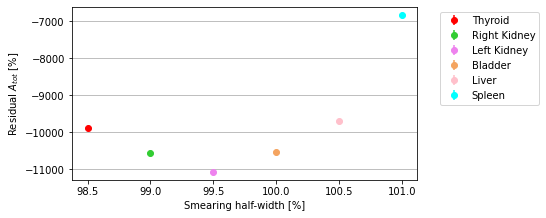

In [39]:
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.71,.8,.6))
for j in range(len(A0s)):
    x = np.asarray(widths)*100
    x = x+j/2-len(A0s)/4
    plt.errorbar(x, Att_means[:,j], Att_vars[:,j], None, 'o', label=OrganNames[j],color=lightcolors[j])
#plt.ylim(-100,100)
plt.grid(axis='y')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_ylabel(r'Residual $A_{tot}$ [%]')
plt.gca().set_xlabel("Smearing half-width [%]")

In [40]:
nsteps = 10
residui = np.empty(shape=(nsteps,norgans))

In [41]:
residui.shape

(10, 6)

In [42]:
residui[j].shape

(6,)

In [43]:
residui[:,j].shape

(10,)

In [46]:
widths = np.array([.05,.1,.15,.2,.25,.3,.35,.4])
nsteps = 100

#print("AttTrue",AttTrue)
Att_means = np.empty(shape=(len(widths),len(A0s)))
Att_vars = np.empty(shape=(len(widths),len(A0s)))
AttT = np.empty(shape=(len(widths),len(A0s)))
for i, width in enumerate(widths):
    residui = np.empty(shape=(nsteps,len(A0s)))
    for j in range(nsteps):
        for k in range(0,len(MCoutq)):
            resp = det_matrix_smear(times, A0s, taus, k+1)
            CPSall[k] = resp
        CPSall_inv = Minv.dot(CPSall)
        AttStim = np.trapz(CPSall_inv,x=times,axis=1)
        #print("AttStim",AttStim)
        residui[j] = (AttTrue-AttStim)/AttTrue*100
    for j in range(len(A0s)):    
        Att_means[i][j] = np.mean(residui[:,j])
        Att_vars[i][j] = np.std(residui[:,j])

AttTrue [1.15859561e+11 1.87407626e+09 1.44001330e+09 3.41056479e+08
 3.43116845e+10 2.92952884e+09]
AttStim [1.16123690e+11 2.46731985e+09 1.55870105e+09 4.27179210e+08
 3.40789184e+10 1.13313691e+09]
AttStim [1.15513316e+11 1.05013635e+09 1.72048444e+09 2.98420538e+08
 3.10422929e+10 4.20935884e+09]
AttStim [1.15479010e+11 3.04720269e+09 1.38240565e+09 4.29113008e+08
 3.22406310e+10 3.43589034e+09]
AttStim [1.14914686e+11 1.48987976e+09 1.15963298e+09 3.40410240e+08
 3.48046302e+10 3.41044196e+09]
AttStim [1.16101160e+11 1.68013135e+09 1.73668559e+09 3.85329736e+08
 3.30117088e+10 2.15876165e+09]
AttStim [1.15321723e+11 2.83360046e+09 2.14051792e+09 4.13755636e+08
 3.42497048e+10 5.78535983e+08]
AttStim [1.15139527e+11 2.17367583e+09 1.64828832e+09 3.59956823e+08
 3.44836401e+10 1.62944782e+09]
AttStim [1.15634043e+11 2.25570444e+09 1.42166727e+09 3.66212764e+08
 3.57298516e+10 2.88594656e+09]
AttStim [1.15456741e+11 1.80416462e+09 2.00402382e+09 4.62546546e+08
 3.38605340e+10 1.2040

AttStim [1.15719405e+11 2.07398424e+09 1.61392024e+09 3.78695387e+08
 3.32195629e+10 1.56586946e+09]
AttStim [1.15702416e+11 1.44868751e+09 1.56763607e+09 3.06098231e+08
 3.36583930e+10 2.81641188e+09]
AttStim [1.15881013e+11 2.03800616e+09 1.53839230e+09 3.59375289e+08
 3.17842889e+10 1.47634025e+09]
AttStim [1.15353094e+11 1.44880744e+09 1.24923000e+09 3.36605207e+08
 3.43450825e+10 4.86883661e+09]
AttStim [1.16260944e+11 2.26038713e+09 2.01982701e+09 3.66850572e+08
 3.45601001e+10 6.14576600e+08]
AttStim [1.15214708e+11 1.29169938e+09 1.37086680e+09 2.47603666e+08
 3.66447359e+10 1.65881863e+09]
AttStim [1.16072218e+11 1.81189302e+09 1.80660075e+09 3.67661649e+08
 3.40805033e+10 1.78289924e+09]
AttStim [1.16127805e+11 2.34222093e+09 1.57151985e+09 3.36449819e+08
 3.15116368e+10 3.46290695e+09]
AttStim [1.15439726e+11 2.49847610e+09 1.90302195e+09 3.04637737e+08
 3.35538472e+10 1.01514569e+09]
AttStim [1.15328897e+11 1.74894224e+09 1.97255840e+09 3.89586112e+08
 3.59348534e+10 1.4952

AttStim [1.16068338e+11 2.07048713e+09 1.66080156e+09 3.83610095e+08
 3.04401338e+10 1.74006869e+09]
AttStim [ 1.15722026e+11  2.89601693e+09  1.95873938e+09  3.56002319e+08
  3.23215839e+10 -2.59434230e+08]
AttStim [1.15013211e+11 2.43901939e+09 1.45356713e+09 3.77323831e+08
 3.35668746e+10 2.28589423e+09]
AttStim [1.15403036e+11 1.05236559e+09 1.32313773e+09 2.37351866e+08
 3.53960216e+10 3.04010531e+09]
AttStim [1.15715223e+11 2.31353387e+09 1.54355753e+09 1.87037540e+08
 3.47506205e+10 1.49210051e+09]
AttStim [1.14938756e+11 2.02472921e+09 1.45998107e+09 4.75344952e+08
 3.28767293e+10 2.33165554e+09]
AttStim [1.15227757e+11 1.97487998e+09 1.94634467e+09 3.34420947e+08
 3.34800891e+10 2.92335796e+08]
AttStim [1.15807518e+11 1.04393010e+09 1.16117376e+09 3.10616092e+08
 3.49454488e+10 2.61213926e+09]
AttStim [1.15910751e+11 1.85295173e+09 1.03341343e+09 4.51659865e+08
 2.93710695e+10 3.70647858e+09]
AttStim [1.15595315e+11 1.80678666e+09 2.17421684e+09 2.95323258e+08
 3.57644556e+10 

AttStim [1.15598375e+11 1.58863224e+09 1.85279856e+09 3.57841414e+08
 3.48400607e+10 9.20928865e+08]
AttStim [1.15477275e+11 2.26937412e+09 1.45526014e+09 3.21787754e+08
 3.48691662e+10 2.58152076e+09]
AttStim [1.15506302e+11 1.71636612e+09 1.69175277e+09 3.61355987e+08
 3.33622309e+10 2.21344162e+09]
AttStim [1.15940110e+11 1.52665423e+09 1.12670800e+09 4.19349527e+08
 3.22332804e+10 2.47670725e+09]
AttStim [1.15789183e+11 1.55426955e+09 1.68546704e+09 3.37283372e+08
 3.50791265e+10 1.55039053e+09]
AttStim [1.15598193e+11 1.49697960e+09 1.63331591e+09 3.66315255e+08
 3.29331745e+10 1.96845910e+09]
AttStim [1.15754626e+11 2.25360708e+09 1.97218819e+09 3.03076466e+08
 3.23757544e+10 1.34004103e+09]
AttStim [1.15126846e+11 2.31729386e+09 1.60199612e+09 2.96255237e+08
 3.59215654e+10 2.02720052e+09]
AttStim [1.15420097e+11 2.22973559e+09 1.53992127e+09 4.73507177e+08
 3.31128556e+10 1.89912468e+09]
AttStim [1.15897680e+11 2.59983661e+09 1.65178753e+09 2.30270891e+08
 3.30758058e+10 1.5632

AttStim [1.15448169e+11 1.01187165e+09 1.93488880e+09 4.25478166e+08
 3.42769448e+10 8.01907213e+08]
AttStim [1.15907765e+11 2.28386371e+09 1.08126952e+09 3.92063763e+08
 3.42274547e+10 2.31708545e+09]
AttStim [1.15263873e+11 2.38118835e+09 2.08344584e+09 4.48607142e+08
 3.29050741e+10 9.51007658e+08]
AttStim [1.16591250e+11 3.55145356e+09 1.31605420e+09 4.40815132e+08
 3.22030547e+10 1.80975925e+09]
AttStim [1.16153294e+11 2.45789605e+09 1.88424509e+09 3.38591490e+08
 3.48775646e+10 9.17319467e+08]
AttStim [1.15695754e+11 2.35303143e+09 1.80501240e+09 3.10544913e+08
 3.30197740e+10 2.01020956e+09]
AttStim [1.15057863e+11 1.12069502e+09 1.77272349e+09 2.74480125e+08
 3.53794614e+10 1.40685490e+09]
AttStim [1.16084576e+11 1.92951563e+09 1.57423342e+09 3.10538879e+08
 3.17155890e+10 3.02038287e+09]
AttStim [1.15750711e+11 2.11115150e+09 1.57462051e+09 3.77907840e+08
 3.11019405e+10 2.60438044e+09]
AttStim [1.15743565e+11 1.12550930e+09 1.09713649e+09 3.47167942e+08
 3.30022332e+10 3.5709

AttStim [1.15301509e+11 1.42400965e+09 1.49014294e+09 3.82451507e+08
 3.38940710e+10 2.60601772e+09]
AttStim [1.15533252e+11 2.25914530e+09 1.91847936e+09 3.30441610e+08
 3.28540311e+10 1.70240273e+09]
AttStim [1.15612582e+11 2.38742428e+09 1.66399185e+09 3.43609787e+08
 3.10697679e+10 2.38346463e+09]
AttStim [1.15765711e+11 2.31513872e+09 1.76033582e+09 3.96516037e+08
 3.29583467e+10 1.72232355e+09]
AttStim [1.15515523e+11 2.03548321e+09 1.32114901e+09 4.41014572e+08
 3.14283469e+10 4.73619978e+09]
AttStim [1.15653340e+11 1.27570404e+09 1.68772068e+09 3.78615259e+08
 3.42309000e+10 1.66071526e+09]
AttStim [1.15272591e+11 2.01832377e+09 1.42844671e+09 3.22965714e+08
 3.40482494e+10 2.75069521e+09]
AttStim [1.16157028e+11 2.95911989e+09 1.62551187e+09 2.50742832e+08
 3.33243658e+10 1.60552648e+09]
AttStim [1.15629595e+11 2.62188277e+09 1.48340472e+09 3.56380906e+08
 3.35024935e+10 1.36958529e+09]
AttStim [1.15082990e+11 2.11867053e+09 1.30574487e+09 3.75313313e+08
 3.31718465e+10 3.0873

 3.22894252e+10 3.95697966e+09]
AttStim [1.15720411e+11 2.01173503e+09 1.75126212e+09 3.73613410e+08
 3.30381776e+10 1.12018245e+09]
AttStim [1.15926655e+11 1.25090491e+09 1.87404130e+09 2.51446811e+08
 3.74764229e+10 1.40540037e+09]
AttStim [1.15937520e+11 2.40513142e+09 2.13375660e+09 2.37666422e+08
 3.21214418e+10 1.11218840e+09]
AttStim [1.15363689e+11 1.73815659e+09 1.48007588e+09 2.98371878e+08
 3.53527929e+10 2.12169212e+09]
AttStim [1.15944418e+11 2.36555287e+09 1.34171819e+09 3.83679975e+08
 3.34446326e+10 3.13568150e+09]
AttStim [1.15187036e+11 1.78601436e+09 1.61041004e+09 3.62627415e+08
 3.08570156e+10 2.41660963e+09]
AttStim [1.15407366e+11 2.32477257e+09 1.30496215e+09 4.17251882e+08
 3.49563945e+10 2.49841573e+09]
AttStim [1.15754246e+11 1.81743387e+09 2.15345808e+09 4.15842799e+08
 3.25648039e+10 1.56031094e+09]
AttStim [1.15519534e+11 2.30543079e+09 1.56605344e+09 3.49662140e+08
 3.30294710e+10 2.83657243e+09]
AttStim [1.15354805e+11 2.57662405e+09 1.58152392e+09 2.811

Text(0.5, 0, 'Smearing half-width [%]')

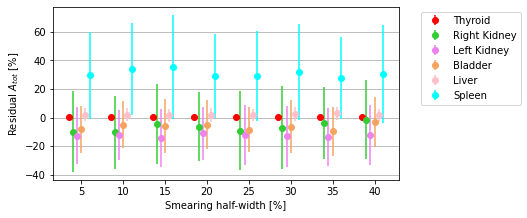

In [47]:
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.71,.8,.6))
for j in range(len(A0s)):
    x = np.asarray(widths)*100
    x = x+j/2-len(A0s)/4
    plt.errorbar(x, Att_means[:,j], Att_vars[:,j], None, 'o', label=OrganNames[j],color=lightcolors[j])
#plt.ylim(-100,100)
plt.grid(axis='y')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_ylabel(r'Residual $A_{tot}$ [%]')
plt.gca().set_xlabel("Smearing half-width [%]")

IndexError: index 6 is out of bounds for axis 0 with size 6

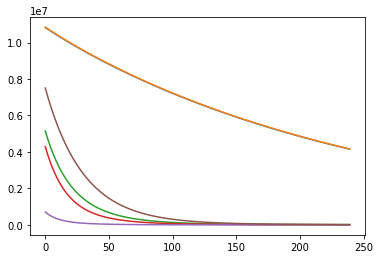

In [50]:
for k in range(7):
    resp = det_matrix_smear(times, A0s, taus, k)
    CPSall[k] = resp
    plt.plot(times,CPSall[k])
plt.yscale('log') 